In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import yfinance as yf
from datetime import datetime
from pandas_datareader import DataReader
from pandas_datareader import data as pdr

In [2]:
yf.pdr_override()

In [3]:
tech_list=['INTC','TSLA','NFLX','ORCL']

In [4]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

for stock in tech_list:
   globals()[stock] = pdr.get_data_yahoo(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
closing_df =  pdr.get_data_yahoo(tech_list, start, end)['Adj Close']

[*********************100%%**********************]  4 of 4 completed


#  What was the change in price of the stock over time?

<Axes: title={'center': 'Closing Prices Over The time period'}, xlabel='Date'>

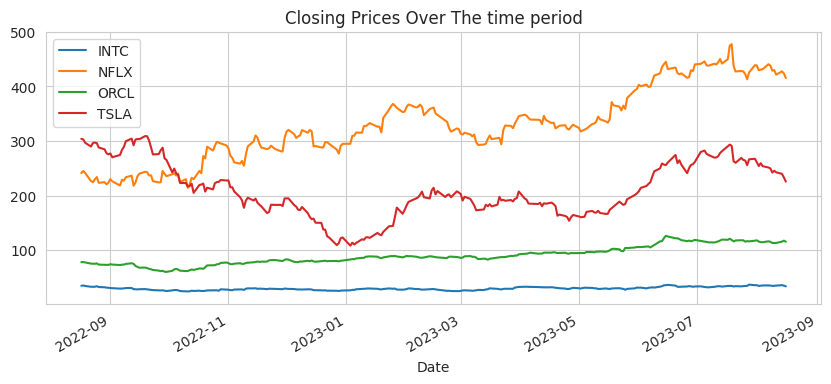

In [6]:
closing_df[['INTC' , 'NFLX' ,'ORCL','TSLA']].plot(legend=True , figsize=(10,4) ,title='Closing Prices Over The time period')

# What was the moving average of the various stocks?

In [7]:
ma_day= [10,20,50]

for ma in ma_day:
  column_name = "MA for %s days" %(str(ma))
  TSLA[column_name]= TSLA['Adj Close'].rolling(ma).mean()

for ma in ma_day:
  column_name = "MA for %s days" %(str(ma))
  INTC[column_name]= INTC['Adj Close'].rolling(ma).mean()

for ma in ma_day:
  column_name = "MA for %s days" %(str(ma))
  NFLX[column_name]= NFLX['Adj Close'].rolling(ma).mean()

for ma in ma_day:
  column_name = "MA for %s days" %(str(ma))
  ORCL[column_name]= ORCL['Adj Close'].rolling(ma).mean()





Text(0.5, 1.0, 'Tesla')

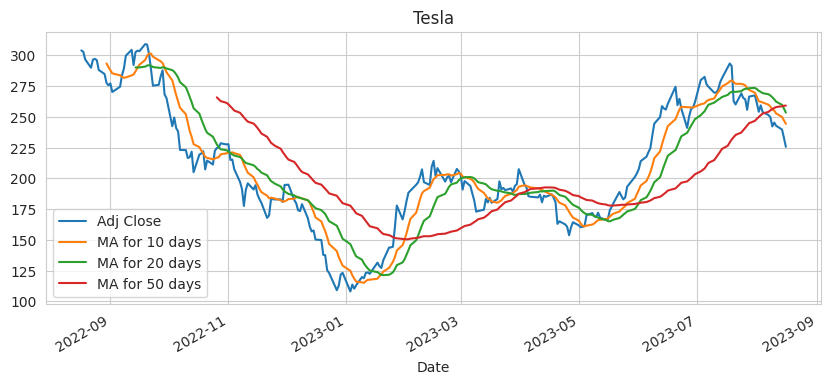

In [47]:
TSLA[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot( legend=True , figsize=(10,4)).set_title('Tesla')

.

Text(0.5, 1.0, 'Intel')

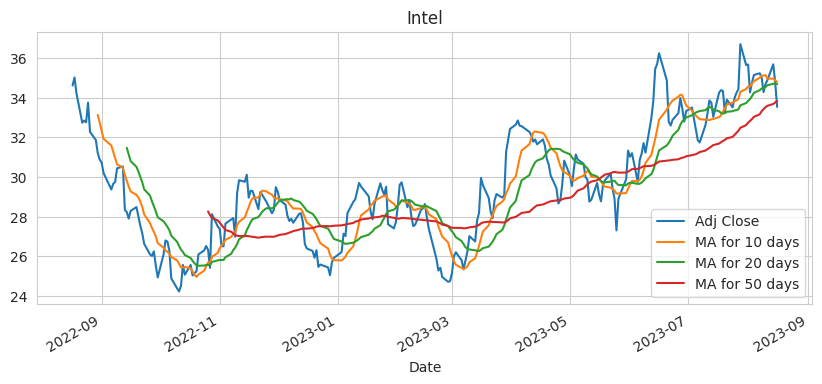

In [48]:
INTC[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot( legend=True , figsize=(10,4)).set_title('Intel')

.

Text(0.5, 1.0, 'Netflix')

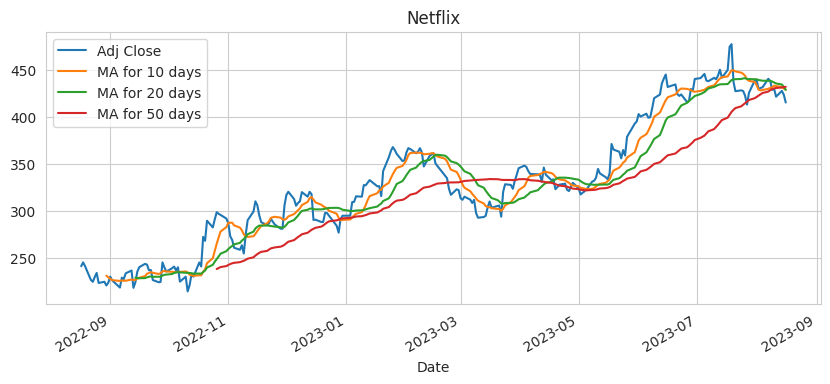

In [51]:
NFLX[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot( legend=True , figsize=(10,4)).set_title('Netflix')



.

Text(0.5, 1.0, 'Oracle')

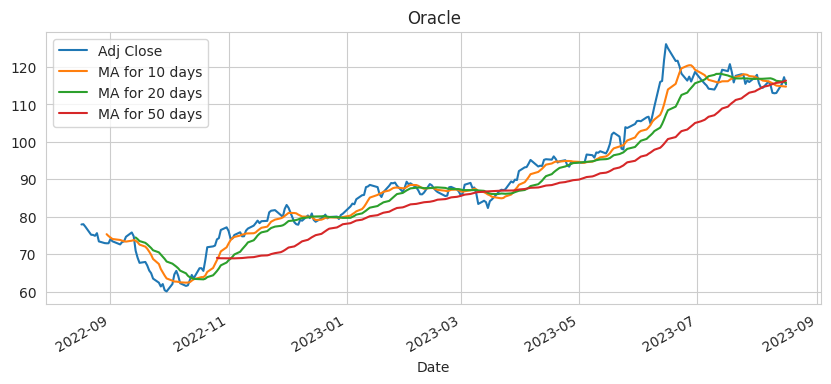

In [52]:
ORCL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot( legend=True , figsize=(10,4)).set_title('Oracle')

.




# What was the daily return of the stock on average?

Text(0.5, 1.0, 'Tesla')

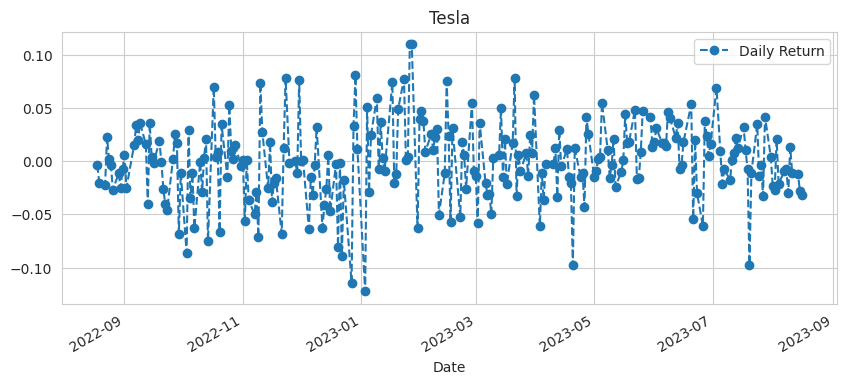

In [19]:
TSLA['Daily Return'] = TSLA['Adj Close'].pct_change()

TSLA['Daily Return'].plot(legend=True , figsize=(10,4) , linestyle='--' , marker='o').set_title('Tesla')


In [14]:
t = TSLA['Daily Return'].mean()
print('Average Daily return for Tesla is ',t)

Average Daily return for Tesla is  -0.0004890283359907195


Text(0.5, 1.0, 'Intel')

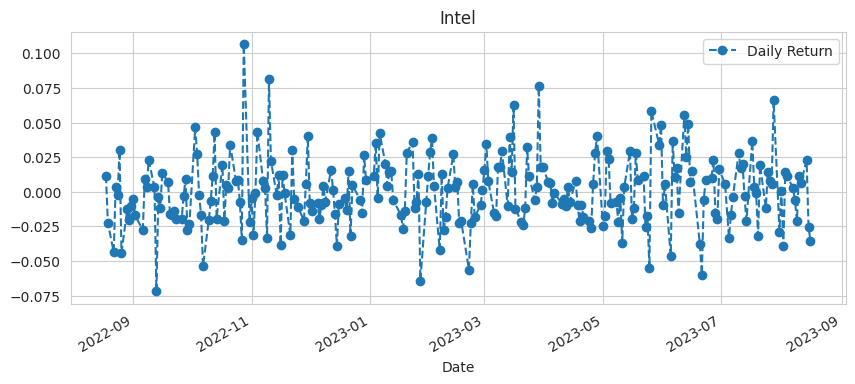

In [22]:
INTC['Daily Return'] = INTC['Adj Close'].pct_change()

INTC['Daily Return'].plot(legend=True , figsize=(10,4) , linestyle='--' , marker='o').set_title('Intel')

In [16]:

i = INTC['Daily Return'].mean()
print('Average Daily return for Intel is ', i)

Average Daily return for Intel is  0.00019315012428963696


Text(0.5, 1.0, 'Netflix')

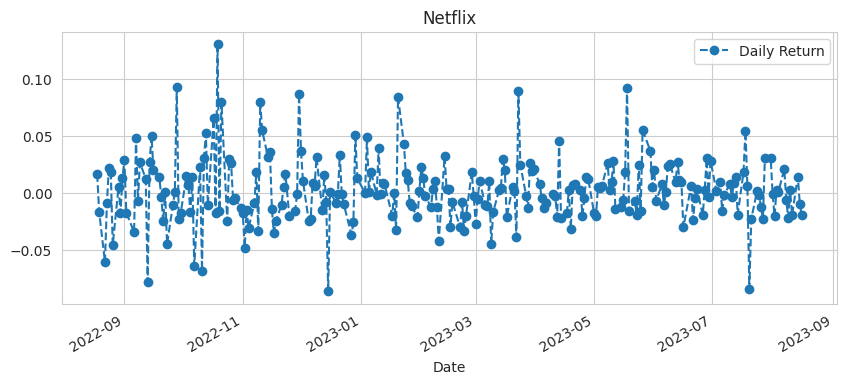

In [23]:
NFLX['Daily Return'] = NFLX['Adj Close'].pct_change()
NFLX['Daily Return'].plot(legend=True , figsize=(10,4) , linestyle='--' , marker='o').set_title('Netflix')


In [18]:

n = NFLX['Daily Return'].mean()
print('Average Daily return for Intel is ',n)

Average Daily return for Intel is  0.0025964936524371395


Text(0.5, 1.0, 'Oracle')

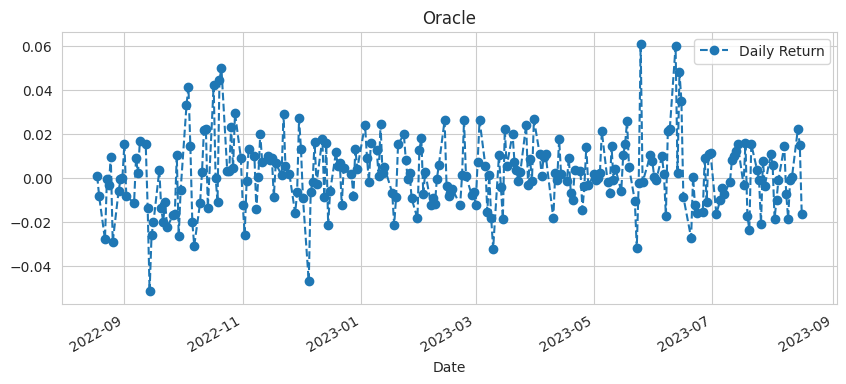

In [25]:
ORCL['Daily Return'] = ORCL['Adj Close'].pct_change()

ORCL['Daily Return'].plot(legend=True , figsize=(10,4) , linestyle='--' , marker='o').set_title('Oracle')


In [21]:

o = ORCL['Daily Return'].mean()
print('Average Daily return for Oracle is ',o)

Average Daily return for Oracle is  0.0017002102285657496


##  What was the correlation between different stocks' closing prices?

<Axes: >

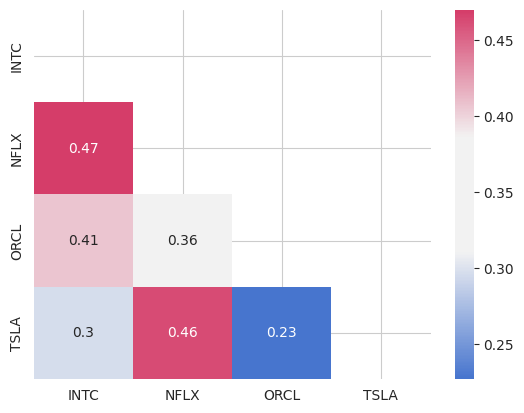

In [26]:
tech_rets = closing_df.pct_change()
corr = tech_rets.dropna().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(corr , cmap=sns.diverging_palette(256,0,sep=80,n=7,as_cmap=True), annot=True , mask=mask)

##What was the correlation between different stocks' daily returns?

In [27]:
return_df =  pdr.get_data_yahoo(tech_list, start, end)['Adj Close'].pct_change()

[*********************100%%**********************]  4 of 4 completed


<Axes: >

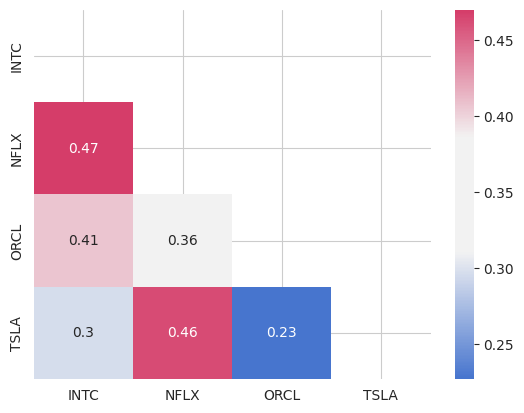

In [28]:

corr2 = return_df.dropna().corr()
mask2 = np.zeros_like(corr)
mask2[np.triu_indices_from(mask2)]=True

sns.heatmap(corr2 , cmap=sns.diverging_palette(256,0,sep=80,n=7,as_cmap=True), annot=True , mask=mask2)

## How much value do we put at risk by investing in a particular stock?

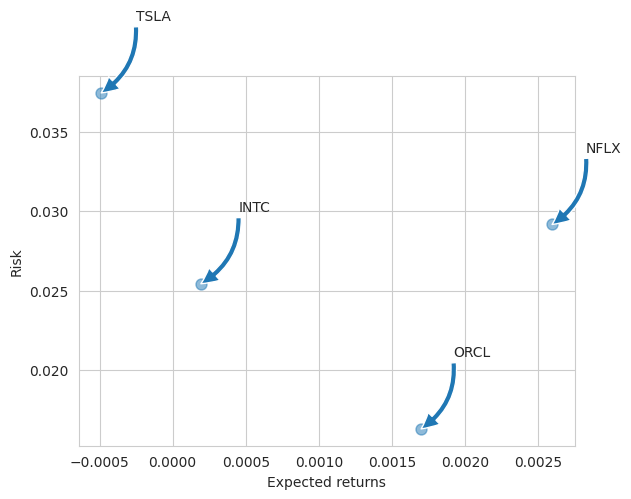

In [29]:

rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')


for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict( connectionstyle = 'arc3,rad=-0.3'))

##Monte Carlo Analysis

In [30]:
def stock_monte_carlo(start_price , days , mu , sigma):

  price = np.zeros(days)
  price[0]=start_price

  shock = np.zeros(days)
  drift = np.zeros(days)

  dt = 1/days

  for x in range(1,days):
    shock[x] = np.random.normal(loc=mu*dt , scale = sigma*np.sqrt(dt))
    drift[x] = mu*dt
    price[x] = price[x-1] + (price[x-1] * ( drift[x] + shock[x] ))

  return price

In [31]:
days=365
dt = 1/days
mu = rets.mean()['TSLA']
sigma = rets.std()['TSLA']

Text(0.5, 1.0, 'Monte Carlo Analysis for Tesla')

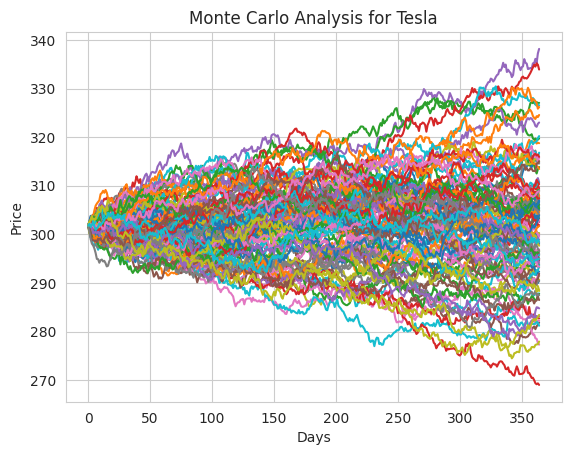

In [32]:
start_price = 301.786682

for i in range(100):
  plt.plot(stock_monte_carlo (start_price , days , mu , sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Tesla')


Text(0.5, 1.0, 'Monte Carlo Analysis for Intel')

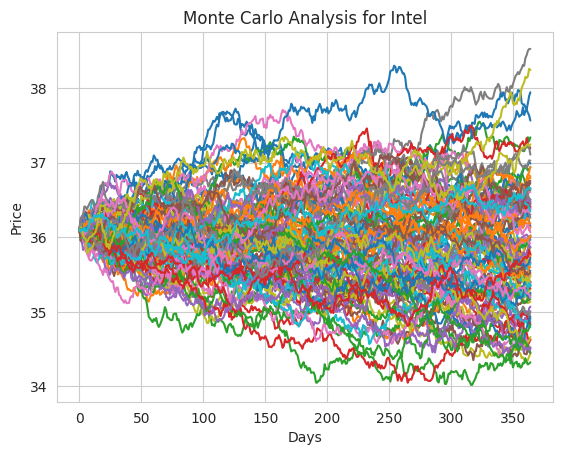

In [33]:
days=365
dt = 1/days
mu = rets.mean()['INTC']
sigma = rets.std()['INTC']

start_price = 36.099998

for i in range(100):
  plt.plot(stock_monte_carlo (start_price , days , mu , sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Intel')


Text(0.5, 1.0, 'Monte Carlo Analysis for Netflix')

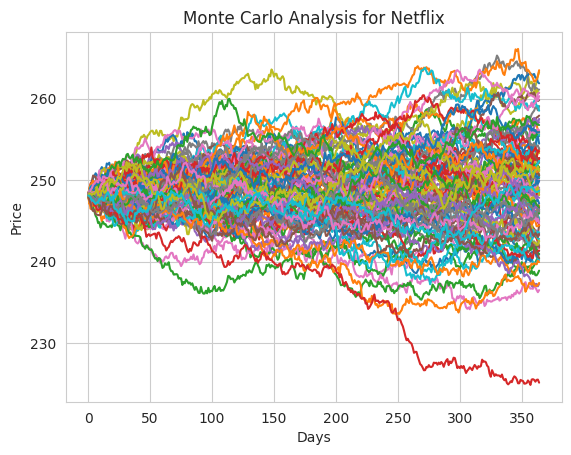

In [34]:
days=365
dt = 1/days
mu = rets.mean()['NFLX']
sigma = rets.std()['NFLX']

start_price = 248.110001

for i in range(100):
  plt.plot(stock_monte_carlo (start_price , days , mu , sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Netflix')


Text(0.5, 1.0, 'Monte Carlo Analysis for Oracle')

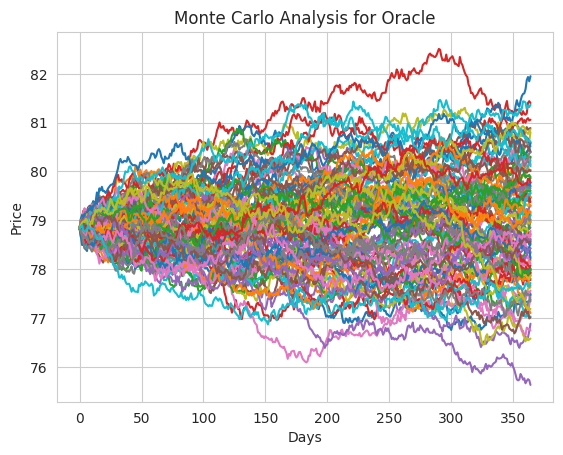

In [35]:
days=365
dt = 1/days
mu = rets.mean()['ORCL']
sigma = rets.std()['ORCL']

start_price = 78.839996

for i in range(100):
  plt.plot(stock_monte_carlo (start_price , days , mu , sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Oracle')


## Final Price Distribution

Text(0.5, 1.0, 'Final price distribution for Tesla stock after 365 days')

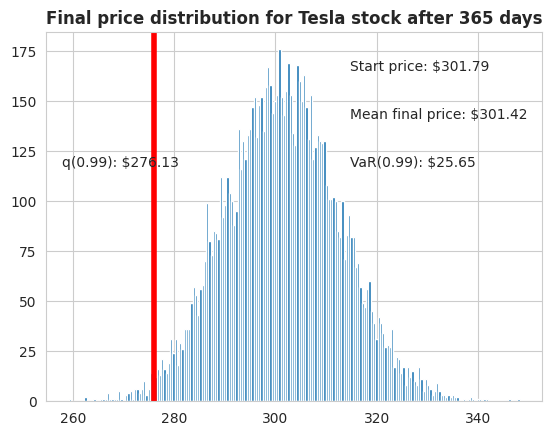

In [36]:
runs=10000
start_price = 301.786682
simulations = np.zeros(runs)
mu = rets.mean()['TSLA']
sigma = rets.std()['TSLA']

for run in range(runs):
  simulations[run] = stock_monte_carlo(start_price , days , mu , sigma)[days-1]

q = np.percentile(simulations,1)
plt.hist(simulations , bins=200)

# starting price
plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

# mean ending price
plt.figtext(0.6,0.7,"Mean final price: $%.2f" %simulations.mean())

# variance of price within 99% confidence interval
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" %(start_price -q))

# display 1% quantile
plt.figtext(0.15,0.6,"q(0.99): $%.2f" %q)

# plot a line at the 1% quantile result
plt.axvline(x=q , linewidth=4 , color='r')

# title
plt.title("Final price distribution for Tesla stock after %s days" %days,weight='bold')

Text(0.5, 1.0, 'Final price distribution for Intel stock after 365 days')

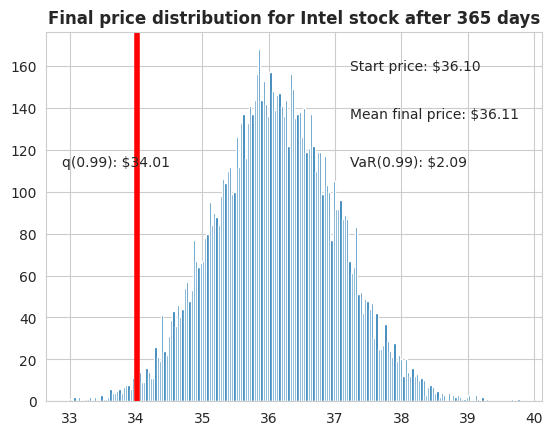

In [37]:
runs=10000
start_price = 36.099998
simulations = np.zeros(runs)
mu = rets.mean()['INTC']
sigma = rets.std()['INTC']

for run in range(runs):
  simulations[run] = stock_monte_carlo(start_price , days , mu , sigma)[days-1]

q = np.percentile(simulations,1)
plt.hist(simulations , bins=200)

# starting price
plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

# mean ending price
plt.figtext(0.6,0.7,"Mean final price: $%.2f" %simulations.mean())

# variance of price within 99% confidence interval
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" %(start_price -q))

# display 1% quantile
plt.figtext(0.15,0.6,"q(0.99): $%.2f" %q)

# plot a line at the 1% quantile result
plt.axvline(x=q , linewidth=4 , color='r')

# title
plt.title("Final price distribution for Intel stock after %s days" %days,weight='bold')

Text(0.5, 1.0, 'Final price distribution for Netflix stock after 365 days')

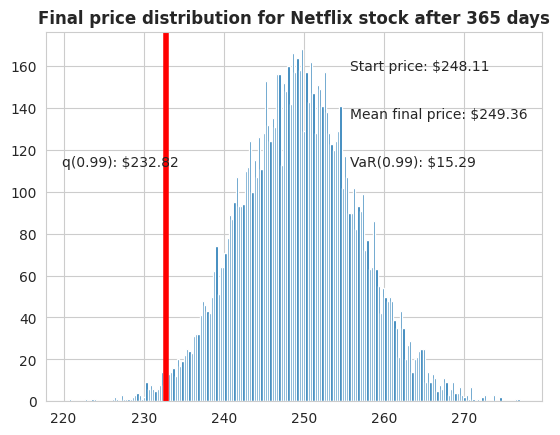

In [38]:
runs=10000
start_price = 248.110001
simulations = np.zeros(runs)
mu = rets.mean()['NFLX']
sigma = rets.std()['NFLX']

for run in range(runs):
  simulations[run] = stock_monte_carlo(start_price , days , mu , sigma)[days-1]

q = np.percentile(simulations,1)
plt.hist(simulations , bins=200)

# starting price
plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

# mean ending price
plt.figtext(0.6,0.7,"Mean final price: $%.2f" %simulations.mean())

# variance of price within 99% confidence interval
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" %(start_price -q))

# display 1% quantile
plt.figtext(0.15,0.6,"q(0.99): $%.2f" %q)

# plot a line at the 1% quantile result
plt.axvline(x=q , linewidth=4 , color='r')

# title
plt.title("Final price distribution for Netflix stock after %s days" %days,weight='bold')

Text(0.5, 1.0, 'Final price distribution for Oracle stock after 365 days')

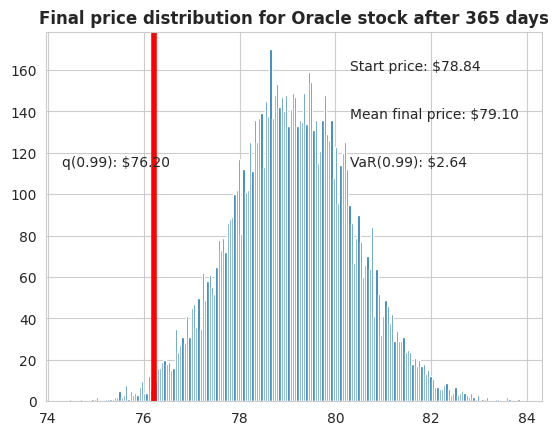

In [39]:
runs=10000
start_price = 78.839996
simulations = np.zeros(runs)
mu = rets.mean()['ORCL']
sigma = rets.std()['ORCL']

for run in range(runs):
  simulations[run] = stock_monte_carlo(start_price , days , mu , sigma)[days-1]

q = np.percentile(simulations,1)
plt.hist(simulations , bins=200)

# starting price
plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

# mean ending price
plt.figtext(0.6,0.7,"Mean final price: $%.2f" %simulations.mean())

# variance of price within 99% confidence interval
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" %(start_price -q))

# display 1% quantile
plt.figtext(0.15,0.6,"q(0.99): $%.2f" %q)

# plot a line at the 1% quantile result
plt.axvline(x=q , linewidth=4 , color='r')

# title
plt.title("Final price distribution for Oracle stock after %s days" %days,weight='bold')

## Predicting The future stock prices of Tesla using LSTM

In [40]:
df = pdr.get_data_yahoo('TSLA' , start='2022-01-09' , end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-10,333.333344,353.033325,326.666656,352.706665,352.706665,91815000
2022-01-11,351.223328,358.616669,346.273346,354.799988,354.799988,66063300
2022-01-12,359.616669,371.613342,357.529999,368.739990,368.739990,83739000
2022-01-13,369.690002,371.866669,342.179993,343.853333,343.853333,97209900
2022-01-14,339.959991,350.666656,337.793335,349.869995,349.869995,72924300
...,...,...,...,...,...,...
2023-08-10,245.399994,251.800003,243.000000,245.339996,245.339996,109498600
2023-08-11,241.770004,243.789993,238.020004,242.649994,242.649994,98866600
2023-08-14,235.699997,240.660004,233.750000,239.759995,239.759995,98595300


In [41]:
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset)*0.95))

training_data_len

382

In [42]:
# scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [43]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()


x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.8936491 , 0.90129687, 0.95222545, 0.86130422, 0.88328557,
       0.8600255 , 0.81757287, 0.8183279 , 0.7545515 , 0.73762403,
       0.72349749, 0.74664796, 0.61474759, 0.63575471, 0.74580764,
       0.73914625, 0.70798264, 0.69030014, 0.72948914, 0.71002854,
       0.72788163, 0.7400596 , 0.70663089, 0.65237769, 0.67157037,
       0.7284052 , 0.72957432, 0.67228884, 0.64869998, 0.60552876,
       0.53551721, 0.58024721, 0.5913292 , 0.66507946, 0.65769949,
       0.67659984, 0.62715702, 0.62593917, 0.584887  , 0.60902386,
       0.65112339, 0.62595133, 0.57364669, 0.53835472, 0.58161111,
       0.62830172, 0.66650423, 0.70765385, 0.72685868, 0.81553912,
       0.82178653, 0.83982214, 0.83582778, 0.93471342, 0.94412714,
       0.93733173, 0.91737198, 0.92588438, 1.        , 0.93400711])]
[0.8785970563035346]

[array([0.8936491 , 0.90129687, 0.95222545, 0.86130422, 0.88328557,
       0.8600255 , 0.81757287, 0.8183279 , 0.7545515 , 0.73762403,
       0.72349749, 0.74664796, 0.614

In [44]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam' , loss='mean_squared_error')

model.fit(x_train , y_train , batch_size=1 , epochs=1)

322/322 [==============================] - 18s 44ms/step - loss: 0.0074


In [45]:
test_data = scaled_data[training_data_len-60: , :]

x_test = []
y_test = dataset[training_data_len: , :]

for i in range(60 , len(test_data)):
  x_test.append(test_data[i-60:i , 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test , (x_test.shape[0] , x_test.shape[1] , 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

1/1 [==============================] - 1s 1s/step


33.82487673084767

<ipython-input-46-3de74b402dcf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


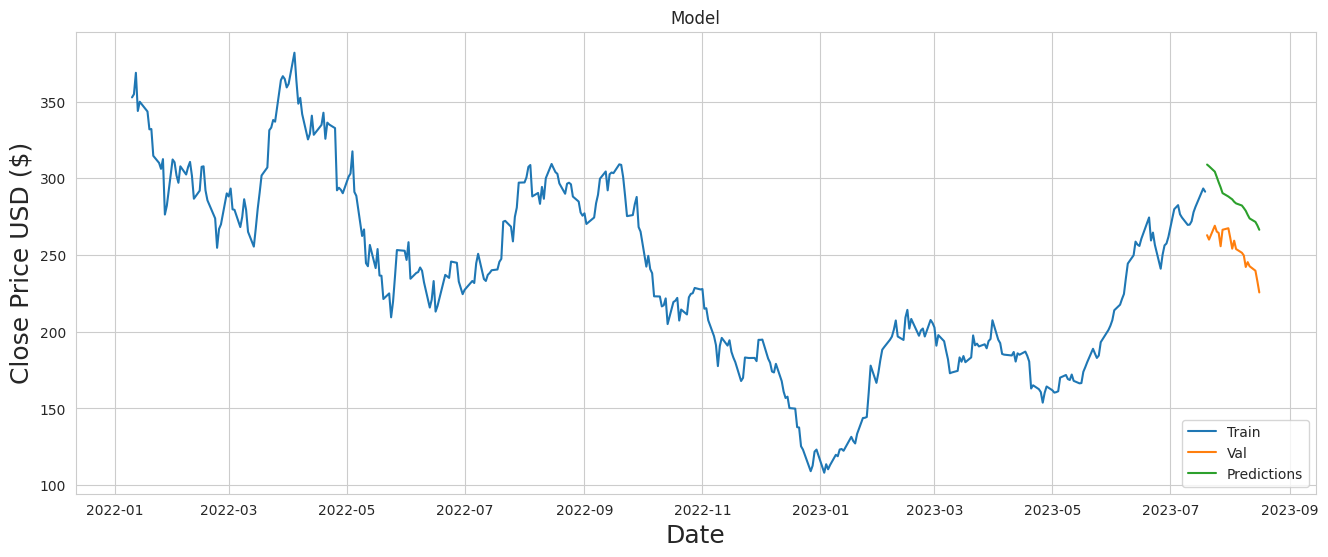

In [46]:
# plot data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()